# Тест

In [ ]:
table

id1   id2
null  1
2     2
5     null
null  null
2     3

In [ ]:
Найти:
 select ... from table

 min(id1) = 2
 max(id1) = 5
 sum(id1) = 9
 sum(id1+id2) = 9
 avg(id1) = 3
 sum(5) = 25


 count(*) = 5
 count(1) = 5
 count('id1') = 5
 count(id1) = 3
 count(distinct id1) = 2

SUM(CASE WHEN id1 IS NULL THEN 1 ELSE 0 END)

Посчитать количество значений null в столбце id1 не используя условия where и filter 




CREATE TABLE table_name (
    id1 INT,
    id2 INT
);

INSERT INTO table_name (id1, id2) VALUES
   (NULL, 1),
   (2, 2),
   (5, NULL),
   (NULL, NULL),
   (2, 3);

### Блок 1

**Таблица employees, содержит информацию о сотрудниках:**

In [ ]:
id	name	    city	department	salary
1	  Дарья	    Рязань	hr	        70
2	  Борис	    Рязань	hr	        78
21	Елена	    Рязань	it	        84
22	Ксения	  Москва	it	        90
23	Леонид	  Рязань	it	        104
24	Марина	  Москва	it	        104
25	Иван	    Москва	it	        120
41	Вероника	Москва	sales	      96
52	Григорий	Рязань	sales	      96
53	Анна	    Москва	sales	      100

1. Необходимо вывести общие затраты компании на зарплату сотрудникам **нарастающим итогом** для каждого отдела. Проанализировать полученный результат. 
Должен появиться отдельный столбец, который покажет нарастающий итог в разрезе департаментов, пример в HR отделе 1 строка будет 70, второая - 148


2. Необходимо посчитать для каждого сотрудника зарплату предыдущего и следующего коллеги. Принимаем за факт, что текущая сортировка является актуальной.
Должны появиться 2 отдельных столбца, пример для первой строки столбец с предыдущим значением выведет null , а второй столбец выведет последующее значение - 78


In [ ]:
'''
select t.id, t.name, t.department, t.salary,
sum(t.salary) over w as total

from employees as t
window w as (
partition by t.department
order by t.salary
rows between unbounded preceding and current row)
order by t.department, t.salary, t.id
'''



'''
with tab as (
select t.*, lag(t.salary, 1) over w as prev,
lead(t.salary, 1) over z as next
from employees as t
window w as (
    order by t.salary asc
), z as (
        order by t.salary asc
        )
)
select t.name, t.department, t.prev, t.salary, t.next
from tab as t
'''

In [ ]:
1. Метод с использованием индексации
Первый и самый простой способ проверить, является ли строка палиндромом, — использовать трюк с индексацией для получения «зеркальной» строки и сравнения её с исходной.

s = "radar"
if s == s[::-1]:
  print("Это палиндром")
else:
  print("Это не палиндром")

2. Метод с использованием цикла
Мы можем также использовать цикл для определения палиндрома, сравнивая символы на симметричных позициях.

s = "radar"
is_palindrome = True
for i in range(len(s) // 2):
  if s[i] != s[-i - 1]:
    is_palindrome = False
    break

if is_palindrome:
  print("Это палиндром")
else:
  print("Это не палиндром")

3. Использование функции
Проверку на палиндром можно также реализовать с помощью рекурсивной функции.

def is_palindrome(s):
  if len(s) < 2:
    return True
  if s[0] != s[-1]:
    return False
  return is_palindrome(s[1:-1])

4. Определение палиндрома с учетом пробелов и знаков препинания
Если вы хотите проверить, является ли строка палиндромом, игнорируя пробелы, знаки препинания и регистр, вы можете использовать методы lower() и replace(), а также функцию isalnum() для удаления всех небуквенных символов.

s = "A man, a plan, a canal: Panama"
s = ''.join(c for c in s if c.isalnum()).lower()
if s == s[::-1]:
  print("Это палиндром")
else:
  print("Это не палиндром")



5. Использование стека
Этот подход использует структуру данных «стек», чтобы сохранить первую половину строки и затем сравнить ее с обратной половиной.

def is_palindrome(s):
  s = ''.join(c for c in s if c.isalnum()).lower()
  stack = list()
  for character in s:
    stack.append(character)
  for character in s:
    if character != stack.pop():
      return False
  return True

### Блок 2

In [1]:
#синтетический df
#запустить!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns

n = 500  # количество записей
dates = pd.date_range(start='2023-01-01', periods=n, freq='D')
user_ids = np.random.randint(1, 100, n)
action_types = np.random.choice(['click', 'purchase', 'login'], n)
client_platforms = np.random.choice(['iOS', 'Android', 'Web'], n)

# Создание DataFrame
data = {
    'time': dates,
    'user_id': user_ids,
    'action_type': action_types,
    'client_platform': client_platforms
}
df = pd.DataFrame(data)

# Вывод первых 5 строк данных
df.head()

,time,user_id,action_type,client_platform
0,2023-01-01,89,purchase,Android
1,2023-01-02,19,click,Web
2,2023-01-03,86,click,iOS
3,2023-01-04,35,click,iOS
4,2023-01-05,10,purchase,Web


1. Вывести количество уникальных пользователей, которые использовали платформу IOS в 2023 году

In [3]:
df.query('client_platform == "iOS" & time >= "2023-01-01" & time < "2024-01-01"').groupby('client_platform', as_index=False)['user_id'].nunique()

#df['month'] = df['time'].dt.month
#df_grouped = df.groupby(by = ['month', 'action_type']).user_id.nunique().reset_index()


#df[(df['time'] >= '2023-01-01')&(df['client_platform'] == 'iOS')]['user_id'].nunique()

82

2. Необходио визуализировать временной ряд, который отражает кол-во уникальных пользоватлей по каждому событию за каждый месяц, вне зависимости от платформы 

<Axes: xlabel='time'>

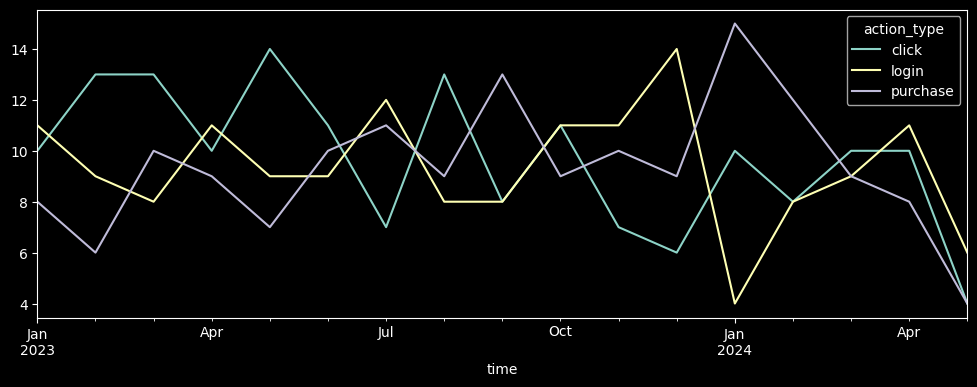

In [4]:

df_grouped = df.groupby([df['time'].dt.to_period('M'), 'action_type'])['user_id'].nunique().reset_index()
pivot_table = df_grouped.pivot(index='time', columns='action_type', values='user_id')
pivot_table.plot(kind = 'line', figsize=(12, 4))


#вариант 2
# df_grouped = df.groupby([df['time'].dt.to_period('M'), 'action_type'])['user_id'].nunique().reset_index()
# plt.figure(figsize=(12, 4))
# sns.barplot(x='time', y='user_id', hue='action_type', data=df_grouped)
# plt.title('временной ряд')
# plt.xlabel('месяц')
# plt.ylabel('юзеры')
# plt.xticks(rotation=45)
# plt.show()

#вариант 3 фи.
#plot = sns.lineplot(x = 'month', y = 'user_id', hue = 'action_type', data = df_grouped)
#plot.set(xlabel='Номер месяца', ylabel='Кол-во уникальных пользователей')

### Вопросы
SQL 

1. Типы джойнов?(self, что такое крос )

2. Какие типы оконных фунцкций существуют(Функции ранжирования, Аналитические функции, Функции агрегирования, Функции распределения, Функции смещения)?

3. Какие методы оптимизации запроса существуют? 

(
1. Индексирование: создание индексов на столбцах, которые часто используются в условиях WHERE, ORDER BY или JOIN. Индексы позволяют быстро находить нужные данные, не просматривая всю таблицу.
2. Денормализация данных: иногда может быть полезно денормализовать данные, то есть дублировать некоторую информацию в таблицах, чтобы избежать сложных соединений.
3. Разделение больших таблиц: если у вас есть очень большие таблицы, их можно разделить на несколько меньших таблиц, что может улучшить производительность.
4. Использование временных таблиц: если вам нужно выполнять одни и те же сложные запросы несколько раз, может быть полезно сохранить результаты в временной таблице и работать с ней.
5. Оптимизация запросов: проанализируйте свои запросы и убедитесь, что они не выполняют лишних операций. Например, избегайте использования функций в условиях WHERE или JOIN, если это возможно.
6. Использование подзапросов: иногда подзапросы могут быть более эффективными, чем сложные соединения.
7. Кэширование результатов запросов: если вы часто выполняете одни и те же запросы, может быть полезно кэшировать их результаты.
8. Партиционирование таблиц: разделение больших таблиц на более мелкие части (партиции) может улучшить производительность для определенных типов запросов.
9. Использование индексированных представлений: представления, основанные на индексах, могут значительно ускорить выполнение некоторых запросов.
10. Мониторинг и анализ производительности: регулярный мониторинг и анализ производительности SQL-запросов позволяет выявлять "узкие места" и своевременно их устранять.)





1. ЦПТ?
ЦПТ (Центральная Предельная Теорема) - это фундаментальная теорема в статистике, которая говорит о распределении средних значений выборок из любого распределения при достаточно большом размере выборки.

2. Меры центральной тенденции?(Как считается мода?)
Существуют следующие меры центральной тенденции:
Среднее значение (Mean): Сумма всех значений в наборе данных, деленная на их количество.
Медиана (Median): Серединное значение в упорядоченном наборе данных. Если количество значений нечетное, то медиана равна значению в середине. Если количество значений четное, то медиана равна среднему арифметическому двух значений в середине.
Мода (Mode): Значение, которое встречается наиболее часто в наборе данных.
Взвешенное среднее значение (Weighted Mean): Среднее значение, взвешенное с использованием различных весов для каждого значения.
Гармоническое среднее значение (Harmonic Mean): Обратное среднее значение суммы обратных значений в наборе данных.
Геометрическое среднее значение (Geometric Mean): Корень n-ой степени из произведения всех значений в наборе данных, где n - количество значений.
Квантили (Quartiles): Значение, разделяющее упорядоченный набор данных на четверти. Например, первый квантиль (Q1) - значение, которое оставляет 25% значений под ним.
Децили (Deciles) и процентили (Percentiles): Аналогично квантилям, децили и процентили разделяют набор данных соответственно на десятины и сотые доли.

2. Какие методы поиска выбросов вы знаете?
1. **Метод межквартильного размаха (IQR)**: Этот метод использует межквартильный размах (разница между 75-м и 25-м перцентилями) для определения выбросов. Значения, находящиеся за пределами диапазона $Q1 - 1.5 \times IQR$ и $Q3 + 1.5 \times IQR$, считаются выбросами.
2. **Z-оценка**: Z-оценка показывает, насколько отклонение данного значения от среднего значения в единицах стандартного отклонения. Обычно значения, с Z-оценкой за пределами диапазона [-3, 3], считаются выбросами.
3. **Метод обнаружения выбросов на основе машинного обучения**: Методы машинного обучения, такие как Isolation Forest, Local Outlier Factor (LOF) и One-Class SVM, могут использоваться для обнаружения выбросов в данных на основе особенностей их распределения.
4. **Графические методы**: Box plot (ящик с усами) и Scatter plot могут помочь визуально обнаружить выбросы в данных.





Python
1. Типы данных в python?
В Python существует несколько основных типов данных:
Числа:
Целые числа (int): положительные и отрицательные целые числа, например, 1, -10, 100.
Вещественные числа (float): числа с плавающей точкой, например, 3.14, -2.5, 1e-5.
Строки (str): последовательность символов, заключенных в кавычки (одинарные или двойные), например, "Hello", 'World'.

Булевы значения (bool): логические значения True (истина) и False (ложь). Используются для логических операций и условных выражений.

Списки (list): упорядоченные изменяемые коллекции объектов (разных типов), заключенные в квадратные скобки и разделенные запятой, например, [1, 2, 3, "hello"].

Кортежи (tuple): упорядоченные неизменяемые коллекции объектов (разных типов), заключенные в круглые скобки и разделенные запятой, например, (1, 2, 3, "hello").

Множества (set): неупорядоченные коллекции уникальных объектов, заключенные в фигурные скобки, например, {1, 2, 3}.

Словари (dict): неупорядоченные коллекции пар ключ-значение, заключенные в фигурные скобки, например, {"name": "John", "age": 25}.

Это лишь некоторые основные типы данных в Python. Кроме того, существуют и другие типы данных, такие как объекты, функции, модули и классы, которые п


2. Чем отличается tuple от list? 
Главное отличие между tuple (кортеж) и list (список) в Python заключается в их изменяемости и способе представления данных. Вот некоторые основные различия:
Изменяемость: Значения в кортеже не могут быть изменены после его создания, тогда как значения в списке могут быть изменены. Кортежи являются неизменяемыми (immutable), в то время как списки изменяемы.
Синтаксис: Значения в кортеже разделяются запятыми и заключаются в круглые скобки, например, (1, 2, 3). Списки имеют элементы, разделенные запятыми и заключенные в квадратные скобки, например, [1, 2, 3].
Использование: Кортежи обычно используются для хранения и представления неизменяемых и неизменяемых коллекций данных, таких как координаты, набор констант или аргументы функции. Списки используются для динамически изменяемых и упорядоченных коллекций данных.
Производительность: Из-за своей изменяемости и различных методов, работа со списками может занимать больше памяти и времени (например, при добавлении, удалении и сортировке элементов). Но кортежи, будучи неизменяемыми, могут быть немного более эффективными.
Использование памяти: Кортежи, как неизменяемые структуры данных, занимают меньше памяти по сравнению со списками, главным образом из-за отсутствия необходимости хранения информации об изменяемости элементов



3. Отличие множества от кортежа?

Set (Множество):
Множество - это неупорядоченная коллекция уникальных элементов.
Элементы множества не имеют индексов или порядка.
Одно и то же значение не может присутствовать в множестве дважды.
Основные операции над множествами: объединение, пересечение, разность, проверка принадлежности.
Множества часто используются для удаления дубликатов из коллекции элементов.
Tuple (Кортеж или Упорядоченная пара):

Кортеж - это упорядоченная коллекция элементов.
Элементы кортежа имеют фиксированный порядок и индексы.
Один и тот же элемент может встречаться в кортеже несколько раз.
Кортежи неизменяемы (immutable), т.е. после создания их элементы нельзя изменить.
Кортежи часто используются для представления записей или структур данных, где порядок элементов важен.



3. Чем отличается series от dataframe?
Series и DataFrame - это две основные структуры данных, которые предоставляет библиотека Pandas в Python для работы с табличными данными.
Основные отличия между Series и DataFrame:
Series: - Series представляет собой одномерный лейбелированный массив данных. - Она может содержать данные любого типа (числа, строки, булевы значения, объекты и т. д.). - Имеет одну ось (axis), ось меток (axis labels) - индекс. - Имеет встроенные методы и функциональность для манипуляций с данными, такие как фильтрация, сортировка, агрегация и операции математического преобразования.
DataFrame: - DataFrame представляет собой двумерную структуру данных, таблицу, состоящую из множества колонок (Series). - Она может содержать данные разных типов в разных колонках. - Имеет две оси - ось индексов (row index) и ось колонок (column index). - Предлагает удобный способ работы с данными, такой как фильтрация, сортировка, преобразование и анализ данных. - Позволяет объединять, преобразовывать и агрегировать данные с использованием мощных функций индексирования и группировки.
В целом, Series является структурой данных, предназначенной для хранения одномерных данных, тогда как DataFrame - для хранения двумерных данных в табличной форме с множеством колонок.